In [1]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from transformers import BertTokenizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from nltk.stem.porter import PorterStemmer
import pandas as pd
import spacy
from spacy.lang.en import English
import string
from sklearn import utils
import random
import nltk
import numpy as np
import swifter
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
import multiprocessing

In [2]:
pd.options.display.max_colwidth = 3000
pd.options.display.max_rows = 3000

In [3]:
nlp = spacy.load("en_core_web_sm")
remove_words = set(stopwords.words('english') + list(string.punctuation))

def tokenizeText(text):
    text = nlp(str(text))
    tokens=[]
    for tok in text:
        tokens.append(tok.lemma_.lower().strip())

    tokens = [tok for tok in tokens if tok.lower() not in remove_words]
    tokens = [tok for tok in tokens if len(tok) >= 3]
    tokens = [tok for tok in tokens if tok.isalpha()]
    tokenized_Text = (" ").join(tokens)
    return tokenized_Text

In [4]:
txt = "FOR RETURN SERVICE ONLY REPRESENTATION OF PRINTED DOCUMENT PLEASE DO NOT SEND PAYMENTS TO THIS ADDRESS Mortgage Statement P.O. BOX 619063 FREEDOM MORTGAGE' DALLAS, TX 75261-9063 Statement Date 07/07/22 Contact Information Phone: 1-855-690-5900 7-807-75148-0015287-002-000-010-000-000 Customer Care: Monday - Friday 8:00 a.m. - 10:00 p.m. ET Saturday 9:00 a.m. - 6:00 p.m. ET Find us on the web at: www.freedommortgage.com CHRISTOPHER IKAIKAOKALANI MIGGINS 91-1001 KEAUNUI DR UNIT 390 Loan Number 0120122569 EWA BEACH HI 96706-6346 Payment Due Date 08/01/22 $2,617.50 Amount Due** If payment is received after 08/16/22, $104.70 late fee will be charged. Property Address: 91-1001 KEAUNUI DR #390 EWA BEACH HI 96706 Account Information Explanation of Amount Due Principal $1,277.04 Outstanding Principal $611,417.60 Deferred Balance $0.00 Interest $1,146.41 Escrow/Impound (for Taxes and/or Insurance) $194.05 Interest Rate 2.250% Regular Monthly Payment $2,617.50 Prepayment Penalty No Total Fees & Charges $.00 Escrow Balance $914.66 Overdue Payment $.00 Unapplied Funds $0.00 Unpaid Late Charges $.00 Other/Optional Products $.00 Total Amount Due** $2,617.50 Transaction Activity (06/11/22 - 07/07/22) Transaction Date Interest Paid Transaction Transaction Interest Principal Escrow Late Charges Fees Optional Unapplied Description To Date Effective Date Amount Paid Paid Paid Paid Paid Insurance Funds Payment 07/07/22 07/01/22 07/07/22 $2,617.50 $1,148.80 $1,274.65 $194.05 $0.00 $0.00 $0.00 $0.00 IMPORTANT NOTICE: TO THE EXTENT YOUR OBLIGATION HAS BEEN DISCHARGED IN BANKRUPTCY, IS SUBJECT TO THE AUTOMATIC STAY OR IS PROVIDED FOR IN A CONFIRMED PLAN, THIS COMMUNICATION IS FOR REGULATORY COMPLIANCE AND/OR INFORMATIONAL PURPOSES ONLY, AND DOES NOT CONSTITUTE A DEMAND FOR PAYMENT OR AN ATTEMPT TO IMPOSE PERSONAL LIABILITY FOR SUCH OBLIGATION. Past Payments Breakdown Important Messages Paid Last Paid Year Month to Date Principal $1,274.65 $8,872.64 Interest $1,148.80 $8,091.51 Escrow (Taxes and Insurance) $194.05 $1,323.30 Fees** $0.00 $0.00 Late Charges $0.00 $0.00 Partial Payment Unapplied* $0.00 $0.00 Total $2,617.50 $18,287.45 *Partial Payments: Any funds received that are less than a full periodic payment may be applied to your account, promptly returned to you, or held in a non-interest bearing account until enough funds are received to apply to a full periodic payment. **This balance represents the known Amount Due as of the printing of this **Amounts listed here will include other/optional products, if applicable. statement. If you are delinquent, this balance may not represent full to-date reinstatement balance at 1-855-690-5900. reinstatement of your obligation. Please contact us regarding your up- Additional information is provided on the back of the statement. DETACH AND RETURN BOTTOM PORTION WITH YOUR PAYMENT Amount Due FREEDOM MORTGAGE' Due By 08/01/22: $2,617.50 LOAN NUMBER: 0120122569 CHRISTOPHER IKAIKAOKALANI MIGGINS $104.70 late fee will be charged after 08/16/22 Additional Principal $ . Additional Escrow $ . Late Charge $ FREEDOM MORTGAGE . print P.O. BOX 7230 e PASADENA CA 91109-7230 Total Amount Enclosed $ . TTATFDTTADTTTTTFFFATAAFADFDADTDDTFTDAFDDAFDADFTAFDTFFFDDDTFADTDDD et R Make check payable to Freedom Mortgage Intern To change mailing address and/or contact information, check here and complete form on back. "
tokenizeText(txt)

'return service representation printed document please send payment address mortgage statement box freedom mortgage dallas statement date contact information phone customer care monday friday saturday find web christopher ikaikaokalani miggins keaunui unit loan number ewa beach payment due date amount due payment receive late fee charge property address keaunui ewa beach account information explanation amount due principal outstanding principal defer balance interest escrow impound taxes insurance interest rate regular monthly payment prepayment penalty total fees charges escrow balance overdue payment unapplied funds unpaid late charges optional products total amount due transaction activity transaction date interest pay transaction transaction interest principal escrow late charges fees optional unapplied description date effective date amount pay pay pay pay paid insurance funds payment important notice extent obligation discharged bankruptcy subject automatic stay provide confirmed

In [508]:
data = pd.read_csv('./oldnew.csv', low_memory=False)
data.shape

(238401, 9)

In [509]:
data.head(1)

,ADR,text,category,type,date,org/aug,page#,angle,renamed category
0,ADR-2022-100004473184,loanDepot Branch: 102 - Cerritos Branch - Cer...,Setup Submission Form,LD,20220722123724,org,1,0.0,No


In [522]:
data['date'].sort_values(ascending=False).unique()

array([20220805060258, 20220804073822, 20220803052526, 20220803052202,
       20220801061131, 20220729062912, 20220727051802, 20220725095443,
       20220722194504, 20220722194403, 20220722194254, 20220722194154,
       20220722183556, 20220722123724, 20220722122940, 20220722122607,
       20220722120009, 20220713101239, 20220711172905, 20220711164234,
       20220704092931])

In [ ]:
ld_data = data[data['type']=='LD']
ld_data.shape

In [ ]:
nmic_data = data[data['type']=='NMIC']
nmic_data.shape

In [ ]:
mappings = {'Assets - Source of funds': 'Bank Statement',
 'Bank Statement': 'Bank Statement',
 'Bank Statement(s)': 'Bank Statement',
 'BK Papers': 'Bankruptcy Papers',
 'Child Support/Alimony Agreement': 'Divorce Decree / Child Support',
 'Construction Agreement/Contract': 'Purchase Agreement',
 'Contractor Bids': 'Purchase Agreement',
 'Contractor Docs': 'Purchase Agreement',
 'Divorce Decree': 'Divorce Decree / Child Support',
 'Earnest Money Deposit': 'Purchase Agreement',
 'Gift Funds': 'Bank Statement',
 'Hazard Insurance Contact Information': 'Hazard Insurance',
 'Hazard Insurance Dec Page - Final': 'Hazard Insurance',
 'Hazard Insurance Dec Page - Incomplete': 'Hazard Insurance',
 'Hazard Insurance Dec Page - Initial': 'Hazard Insurance',
 'Hazard Insurance Dec Page - Insufficient Coverage': 'Hazard Insurance',
 'Hazard Insurance Declaration': 'Hazard Insurance',
 'Insurance - Cost Estimator': 'Hazard Insurance',
 'Insurance - Hazard Checklist': 'Hazard Insurance',
 'Insurance - Proof Paid': 'Hazard Insurance',
 'Insurance Dec Page, Other': 'Hazard Insurance',
 'Insurance Document - Other': 'Hazard Insurance',
 'Investment Account Statements': 'Retirement Account Statement(s)',
 'Mortgage Statement': 'Mortgage Statement',
 'Mortgage Statement of Inspection of Subject Property': 'Mortgage Statement',
 'Mortgage Statement/Coupon, 1st': 'Mortgage Statement',
 'Mortgage Statement/Coupon, 2nd': 'Mortgage Statement',
 'Other Property 1st Mtg Stmt': 'Mortgage Statement',
 'Other Property 2nd Mtg Stmt': 'Mortgage Statement',
 'Purchase Agreement': 'Purchase Agreement',
 'Purchase Agreement Addendum': 'Purchase Agreement',
 'Purchase Document Other': 'Purchase Agreement',
 'Rental Agreements(s)': 'Rental Agreements(s)',
 'Retirement Account Statement(s)': 'Retirement Account Statement(s)',
 'Sales Checklist': 'Purchase Agreement',
 'Sales Contract and Addendums': 'Purchase Agreement',
 'Sales Contract/Purchase Agreement': 'Purchase Agreement',
 'Sales Forms': 'Purchase Agreement',
 'Sales Stips': 'Purchase Agreement',
 'Divorce Decree / Child Support': 'Divorce Decree / Child Support'}

In [ ]:
ld_data['category'] = ld_data['category'].replace(mappings)
ld_data['category'].value_counts()

In [ ]:
nmic_data['category'] = nmic_data['category'].replace(mappings)
nmic_data['category'].value_counts()

In [ ]:
n = ld_data[ld_data['category']=='Tax Return - Personal'].index.tolist()
ld_data.drop(index= random.sample(n, 60000), inplace=True)
ld_data['category'].value_counts()

In [ ]:
ld_data['token'] = ld_data['text'].swifter.apply(tokenizeText)

In [ ]:
ld_data.to_csv('./ld_tokens.csv', header=True, index=False)

In [ ]:
nmic_data['token'] = nmic_data['text'].swifter.apply(tokenizeText)

In [ ]:
nmic_data.to_csv('./nmic_tokens.csv', header=True, index=False)

In [321]:
ld = pd.read_csv('./ld_tokens.csv')
del ld['gensim token']
del ld['new_category']
print(ld.shape)
ld.head(1)

(143628, 10)


/tmp/ipykernel_16631/975678988.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  ld = pd.read_csv('./ld_tokens.csv')


,ADR,text,category,type,date,org/aug,page#,angle,renamed category,token
0,ADR-2022-100004473184,loanDepot Branch: 102 - Cerritos Branch - Cer...,Setup Submission Form,LD,20220722123724,org,1,0.0,No,loandepot branch cerritos branch cerritos nmls...


In [322]:
nmic = pd.read_csv('./nmic_tokens.csv')
print(nmic.shape)
nmic.head(1)

(34773, 10)


,ADR,text,category,type,date,org/aug,page#,angle,renamed category,token
0,ADR-2022-200000368860,Move In Worksheet Use this worksheet when ent...,Rental Agreements(s),NMIC,20220722194504,org,134,0.0,No,move worksheet use worksheet enter move lease ...


In [323]:
df = pd.concat([ld,nmic])
#df= ld
df.head(1)

,ADR,text,category,type,date,org/aug,page#,angle,renamed category,token
0,ADR-2022-100004473184,loanDepot Branch: 102 - Cerritos Branch - Cer...,Setup Submission Form,LD,20220722123724,org,1,0.0,No,loandepot branch cerritos branch cerritos nmls...


In [324]:
df.shape

(178401, 10)

In [325]:
df.isnull().sum()

ADR                    0
text                 976
category               0
type                   0
date                   0
org/aug                0
page#                  0
angle                  7
renamed category    5404
token               1423
dtype: int64

In [326]:
df.dropna(subset= ['token'], inplace=True)
df.isnull().sum()

ADR                    0
text                   0
category               0
type                   0
date                   0
org/aug                0
page#                  0
angle                  0
renamed category    5184
token                  0
dtype: int64

In [327]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

In [328]:
sentences = df['text'].values
embeddings = sentence_model.encode(sentences)

In [329]:
df['sent_embeddings'] = embeddings.tolist()
df.head(1)

,ADR,text,category,type,date,org/aug,page#,angle,renamed category,token,sent_embeddings
0,ADR-2022-100004473184,loanDepot Branch: 102 - Cerritos Branch - Cer...,Setup Submission Form,LD,20220722123724,org,1,0.0,No,loandepot branch cerritos branch cerritos nmls...,"[-0.044310666620731354, 0.05275221914052963, -..."


In [330]:
df.shape

(176978, 11)

In [331]:
# sentences = nmic['text'].values
# embeddings = sentence_model.encode(sentences)

In [332]:
# nmic['sent_embeddings'] = embeddings.tolist()
# nmic.head(1)

In [334]:
#nmic.shape

In [336]:
cats = ['Retirement Account Statement(s)',
        'Mortgage Statement',
        'Bank Statement',
        'Purchase Agreement',
        'Rental Agreements(s)',
        'Hazard Insurance',
        'Divorce Decree / Child Support',
        'Bankruptcy Papers']

# cats = ['Hazard Insurance',
#         'Divorce Decree / Child Support',
#         'Bankruptcy Papers']
        
temp = []      
for category in df['category']:
    if category not in cats:
        temp.append('others')
    else:
        temp.append('focused')
df['new_category'] = temp

# temp = []      
# for category in nmic['category']:
#     if category not in cats:
#         temp.append('others')
#     else:
#         temp.append('focused')
# nmic['new_category'] = temp

In [337]:
# train = df
# train['new_category'].value_counts()

In [338]:
# test = nmic
# test['new_category'].value_counts()

In [339]:
train = df.sample(frac=0.80, random_state=200)
train.shape

(141582, 12)

In [340]:
test = df.drop(train.index).reset_index(drop=True)
test.shape

(24321, 12)

In [341]:
train['new_category'].value_counts()

others     79979
focused    61603
Name: new_category, dtype: int64

In [342]:
test['new_category'].value_counts()

others     13750
focused    10571
Name: new_category, dtype: int64

In [343]:
from sklearn.linear_model import (RidgeClassifier,
                                  Ridge,
                                  SGDClassifier,
                                 LogisticRegression)
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import (AdaBoostClassifier,
                              ExtraTreesClassifier,
                              RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [344]:
# models = [('Logistic_Classifier',LogisticRegression()),
#           ('KNN_Classifier',KNeighborsClassifier()),
#           ('DecisionTree_Classifier', DecisionTreeClassifier()),
#           ('RandomForest_Classifier', RandomForestClassifier()),
#           ('GradientBoosting_Classifier', GradientBoostingClassifier()),
#           ('Bagging_Classifier', BaggingClassifier()),
#           ('XGBClassifier', XGBClassifier())]

In [345]:
actual_train = train['new_category'].replace({'others': 0, 'focused':1}).values
np.unique(actual_train, return_counts=True)

(array([0, 1]), array([79979, 61603]))

In [346]:
actual_test = test['new_category'].replace({'others': 0, 'focused':1}).values
np.unique(actual_test, return_counts=True)

(array([0, 1]), array([13750, 10571]))

In [347]:
# for i, j in models:
#     j.fit(train['sent_embeddings'].values.tolist(), actual_train)
#     ypred = j.predict(test['sent_embeddings'].values.tolist())
#     print(i, 
#           ': f1-> ', np.round(f1_score(actual_test, ypred),2), 
#           ', Accuracy-> ', np.round(accuracy_score(actual_test, ypred),2),
#           ', ROC_AUC-> ', np.round(roc_auc_score(actual_test, 
#                                                  j.predict_proba(np.round(test['sent_embeddings'].values.tolist(),2))[:,0]),2))

### ExtratreeClassifier

In [559]:
model = ExtraTreesClassifier(n_estimators=500, ccp_alpha=0.004, max_features='log2', class_weight='balanced')
model.fit(train['sent_embeddings'].values.tolist(), actual_train)
predicted = model.predict(train['sent_embeddings'].values.tolist())
print(classification_report(actual_train, predicted))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     79979
           1       0.80      0.94      0.86     61603

    accuracy                           0.87    141582
   macro avg       0.87      0.88      0.87    141582
weighted avg       0.88      0.87      0.87    141582



In [560]:
predicted = model.predict(test['sent_embeddings'].values.tolist())
print(classification_report(actual_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     13750
           1       0.87      0.94      0.90     10571

    accuracy                           0.91     24321
   macro avg       0.91      0.91      0.91     24321
weighted avg       0.91      0.91      0.91     24321



In [561]:
accuracy_score(actual_test, predicted)

0.9098310102380659

In [562]:
f1_score(actual_test, predicted)

0.9002955217094796

In [563]:
roc_auc_score(actual_test, model.predict_proba(np.round(test['sent_embeddings'].values.tolist(),2))[:,0])

0.029124221497923132

In [564]:
roc_auc_score(actual_test, model.predict_proba(np.round(test['sent_embeddings'].values.tolist(),2))[:,1])

0.9708757785020768

### DecisionTree

In [156]:
model = DecisionTreeClassifier()
model.fit(train['sent_embeddings'].values.tolist(), actual_train)
predicted = model.predict(train['sent_embeddings'].values.tolist())

In [157]:
print(classification_report(actual_train, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79822
           1       1.00      1.00      1.00     61760

    accuracy                           1.00    141582
   macro avg       1.00      1.00      1.00    141582
weighted avg       1.00      1.00      1.00    141582



In [158]:
predicted = model.predict(test['sent_embeddings'].values.tolist())
print(classification_report(actual_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13919
           1       0.95      0.94      0.95     10397

    accuracy                           0.96     24316
   macro avg       0.96      0.95      0.95     24316
weighted avg       0.96      0.96      0.96     24316



In [159]:
accuracy_score(actual_test, predicted)

0.9554202993913473

In [160]:
f1_score(actual_test, predicted)

0.9476024748646558

In [161]:
auc= roc_auc_score(actual_test, model.predict_proba(np.round(test['sent_embeddings'].values.tolist(),2))[:,1])
auc

0.9356085014133525

In [162]:
path = model.cost_complexity_pruning_path(train['sent_embeddings'].values.tolist(), actual_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

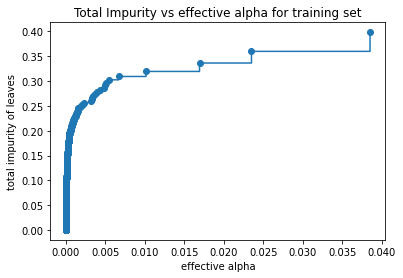

In [163]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [164]:
temp = []
for i in ccp_alphas:
    temp.append(np.round(i,3))
np.unique(temp)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.007, 0.01 , 0.017,
       0.024, 0.039, 0.094])

In [165]:
len(np.unique(temp))

12

In [166]:
clfs = []
for ccp_alpha in np.unique(temp):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train['sent_embeddings'].values.tolist(), actual_train)
    clfs.append(clf)

In [176]:
# train_scores = [clf.score(train['sent_embeddings'].values.tolist(), actual_train) for clf in clfs]
# test_scores = [clf.score(test['sent_embeddings'].values.tolist(), actual_test) for clf in clfs]

In [226]:
train_scores = [f1_score(actual_train, clf.predict(train['sent_embeddings'].values.tolist())) for clf in clfs]
test_scores = [f1_score(actual_test, clf.predict(test['sent_embeddings'].values.tolist())) for clf in clfs]

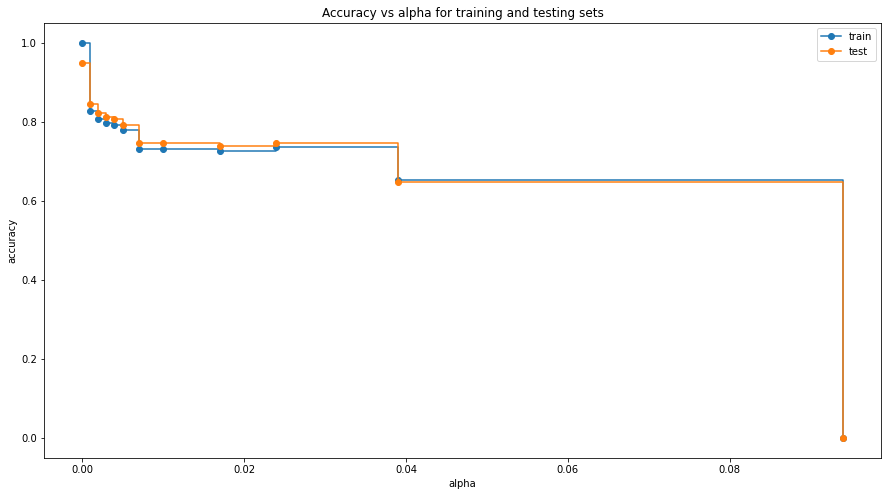

In [237]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(np.unique(temp), train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(np.unique(temp), test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [250]:
model = DecisionTreeClassifier(ccp_alpha=0.004)
model.fit(train['sent_embeddings'].values.tolist(), actual_train)
predicted = model.predict(train['sent_embeddings'].values.tolist())

In [251]:
print(classification_report(actual_train, predicted))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81     79822
           1       0.72      0.87      0.79     61760

    accuracy                           0.80    141582
   macro avg       0.80      0.81      0.80    141582
weighted avg       0.81      0.80      0.80    141582



In [252]:
predicted = model.predict(test['sent_embeddings'].values.tolist())
print(classification_report(actual_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84     13919
           1       0.75      0.87      0.81     10397

    accuracy                           0.82     24316
   macro avg       0.82      0.83      0.82     24316
weighted avg       0.83      0.82      0.82     24316



In [253]:
accuracy_score(actual_test, predicted)

0.8229560783023524

In [254]:
f1_score(actual_test, predicted)

0.8078382359505424

In [255]:
roc_auc_score(actual_test, model.predict_proba(np.round(test['sent_embeddings'].values.tolist(),2))[:,0])

0.10680849573601973

In [263]:
import joblib
joblib.dump(model, './model_other/decision_tree/model.pkl')

['./model_other/decision_tree/model.pkl']

In [488]:
md = joblib.load('./model_other/decision_tree/model.pkl')

### on test data

In [542]:
global_validate = pd.read_csv('/data/mmortgage/amal_workspace/multi_page_classification_preprocessing/domain_testing/BERT Testing_10.08.2022_Results.csv')
global_validate.head(1)

,Ref. No.,Page No.,System Classification (Python Decision),Actual Classification,Status P/F,Comments,text,angle
0,ADR-2022-200000369155,18,Bank Statement,Hazard Insurance,Fail,NaN,(THIS PAGE INTENTIONALLY LEFT BLANK) 1991 Rev. 6-05 51030-0605 Page 2 of 2 Page 16 of 21,0.0


In [543]:
global_validate.shape

(3089, 8)

In [544]:
global_validate.columns

Index(['Ref. No.', 'Page No.', 'System Classification (Python Decision)',
       'Actual Classification', 'Status P/F', 'Comments', 'text', 'angle'],
      dtype='object')

In [530]:
ext.head(1)

,ADR,text,category,type,date,ogr/aug,page#,angle,renamed category
869919,ADR-2022-100004625637,"California USA DRIVER LICENSE CLASS C DL E2256650 EXP 11/03/2022 END NONE LN SORENSEN FN JONATHAN WALTER 1006 ASPEN ST SANTA ANA, CA 92706 DOB 11/03/1991 RSTR CORR LENS 11031991 DONOR SEX M HAIR BRN EYES BLU HGT 5'-11"" WGT 210 lb ISS DD 09/27/201954221/DDFD/22 09/27/2019",Driver's License,LD,20220817104723,org,1,90.5048,NaN


In [531]:
del ext['ogr/aug']
del ext['renamed category']

In [532]:
del ext['type']

In [533]:
del ext['date']

In [535]:
ext.head()

,ADR,text,category,page#,angle
869919,ADR-2022-100004625637,"California USA DRIVER LICENSE CLASS C DL E2256650 EXP 11/03/2022 END NONE LN SORENSEN FN JONATHAN WALTER 1006 ASPEN ST SANTA ANA, CA 92706 DOB 11/03/1991 RSTR CORR LENS 11031991 DONOR SEX M HAIR BRN EYES BLU HGT 5'-11"" WGT 210 lb ISS DD 09/27/201954221/DDFD/22 09/27/2019",Driver's License,1,90.5048
869920,ADR-2022-100004625811,"NORTH CAROLINA ** DRIVER LICENSE NOT FOR FEDERAL IDENTIFICATION Ad DLN 000031918633 31 DOB 04/28/1977 DUP LIMITED-TERM 4b EXP 04/28/2023 - CHEN 2 RUI 8 1935 WALTHAM LN CHARLOTTE, NC 28270-9508 9 CLASS C 9a END NONE 12 RESTR *9-1 15 SEX F 18 EYES BRO 16 HGT 5'-05"" 19HAIR BRO RACE : 4a ISS 07/24/2017 Rui Cher 5 DO 0019669790 04/28/77 NORTH CAROLINA DRIVER LICENSE COMMISSIONER OF MOTOR VEHICLES 4d DLN 000030618633 31DOB 07/29/1973 46 EXP 07/29/2029 1 CHEN XU 8 1935 WALTHAM LN CHARLOTTE, NC 28270-9508 9 CLASS c 9a END NONE 12RESTR 1 15 SEX M 18 EYES BRO 16 HGT 5'-06"" 19 HAIR BLK RACE 48 ISS 05/21/2021 5 DD 0029887977 07/29/73",Driver's License,1,-0.3493
869921,ADR-2022-100004625867,"CLASS: C - Veh w/GVWR ≤26000, No M/C ENDORSEMENTS: None RESTRICTIONS: None This license is issued as a license to drive a motor vehicle; it does not establish eligibility for employment, voter registration, or public benefits. Mill County Rev 08/29/20 17 20282A70111940401 100359",Driver's License,1,0.4658
869922,ADR-2022-100004626045,"SOCIAL SECURITY CIALISECUR 162-64-5190 THIS NUMBER HAS BEEN ESTABLISHED FOR MARQUIA JENEE HILL 5.10 SIGNATURE _06/09/2017 NORTH CAROLINA'S DRIVER LICENSE COMMISSIONER OF MOTOR VEHICLES 4d DLN 000048854162 3]DOB 07/23/1983 4b EXP 07/23/2029 1 HILL MARQUIA 8 1017 FITCHIE PL DURHAM, NC 27703-6521 9 CLASS Da END NONE 12RESTR NONE 15 SEX F 18 EYES BRO 16HGT 5'-04"" 19 HAIR BRO RACE Manifi da ISS 12/14/2021 07/23/83 5. DD 0031396013",Driver's License,1,-0.1027
869923,ADR-2022-100004626264,"Texas USA TX DRIVER LICENSE Lamme me Cow TRECTOR 24216970 4d DL 9 Class C 4a Iss 12/27/2018 4b Exp 02/21/2025 02/21/1978 3 DOB VETERAN 1 CRUZ 2 ANTHONY P JR 8 6115 FOREST WOOD SAN ANTONIO TX 78240 12 Restrictions NONE NONE 9a End 16 Hgt 6'-00"" 15 Sex M 18 Eyes BRO DONOR 5 DD 14614851127217508430",Driver's License,1,-1.1178


In [545]:
ext.columns = ['Ref. No.', 'text', 'Actual Classification', 'Page No.', 'angle']
ext.head(1)           

,Ref. No.,text,Actual Classification,Page No.,angle
869919,ADR-2022-100004625637,"California USA DRIVER LICENSE CLASS C DL E2256650 EXP 11/03/2022 END NONE LN SORENSEN FN JONATHAN WALTER 1006 ASPEN ST SANTA ANA, CA 92706 DOB 11/03/1991 RSTR CORR LENS 11031991 DONOR SEX M HAIR BRN EYES BLU HGT 5'-11"" WGT 210 lb ISS DD 09/27/201954221/DDFD/22 09/27/2019",Driver's License,1,90.5048


In [546]:
global_validate = pd.concat([global_validate,ext])
global_validate.shape

(53483, 8)

In [547]:
global_validate.head(1)

,Ref. No.,Page No.,System Classification (Python Decision),Actual Classification,Status P/F,Comments,text,angle
0,ADR-2022-200000369155,18,Bank Statement,Hazard Insurance,Fail,NaN,(THIS PAGE INTENTIONALLY LEFT BLANK) 1991 Rev. 6-05 51030-0605 Page 2 of 2 Page 16 of 21,0.0


In [548]:
global_validate['Actual Classification'].value_counts()

Bank Statement                         33848
Hazard Insurance Dec Page - Initial     9513
Driver's License                        4116
Purchase Agreement                      1802
Setup Submission Form                    846
Misc Closing Disclosures                 633
Social Security Award Letter             621
SSN Card                                 504
Permanent Resident Card                  402
Award Letter(s)                          276
Retirement Account Statement(s)          245
Hazard Insurance                         193
Rental Agreements(s)                     105
Letter of Explanation                     63
Appraisal - Appraisal Report              52
Disclosures                               52
Earnest Money Deposit                     39
Divorce Decree / Child Support            35
Due Diligence Report                      35
Mortgage Statement                        24
Property - Other                          15
Passport/Green Card                       12
Credit Rep

In [577]:
global_validate.to_csv('./test.csv', index=False)

In [549]:
temp = []

cats = ['Retirement Account Statement(s)',
        'Mortgage Statement',
        'Bank Statement',
        'Purchase Agreement',
        'Rental Agreements(s)',
        'Hazard Insurance',
        'Divorce Decree / Child Support',
        'Bankruptcy Papers']

# cats = ['Hazard Insurance',
#         'Divorce Decree / Child Support',
#         'Bankruptcy Papers']
        
        
for category in global_validate['Actual Classification']:
    if category not in cats:
        temp.append('others')
    else:
        temp.append('focused')
global_validate['new_category'] = temp

In [550]:
global_validate['new_category'].value_counts()

focused    36256
others     17227
Name: new_category, dtype: int64

In [551]:
globaltemp = []
for txt in global_validate['text'].values:
    txt = tokenizeText(str(txt))
    globaltemp.append(txt)
#     globaltemp.append(doc2vec_model.infer_vector(gensim.utils.tokenize(str(txt))))

In [552]:
#sentences = global_validate['text'].values
sentences = globaltemp
sentence_embed = SentenceTransformer('all-MiniLM-L6-v2')
globalembeddings = sentence_embed.encode(sentences)

In [571]:
predicted = md.predict(globalembeddings.tolist())
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [572]:
actual = global_validate['new_category'].replace({'others': 0, 'focused':1}).values
actual

array([1, 1, 1, ..., 1, 1, 1])

In [573]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.65      0.41      0.51     17227
           1       0.76      0.89      0.82     36256

    accuracy                           0.74     53483
   macro avg       0.70      0.65      0.66     53483
weighted avg       0.72      0.74      0.72     53483



In [574]:
accuracy_score(actual, predicted)

0.7382532767421424

In [575]:
f1_score(actual, predicted)

0.8220518882914492

In [576]:
checkfor = [0,1]
for check in checkfor:
    total = 0
    correct = 0
    notclassified = 0
    score = []
    for a,p in zip(actual, predicted):
             
        if a == check:
            total+=1
            if (p == check):
                correct+=1
            elif (p!=check):
                notclassified+=1
                
    if total!=0:
        acc = round(correct/total,2)
        if check==0:
            print('accuracy for {}: {}/{}={}'.format('others : ',correct,total,acc))
        else:
            print('accuracy for {}: {}/{}={}'.format('focused : ',correct,total,acc))
        #print('notclassified {}'.format(notclassified))
        print('\n')

accuracy for others : : 7149/17227=0.41


accuracy for focused : : 32335/36256=0.89




In [ ]:
global_validate.columns

In [ ]:
global_validate['Actual Classification'][(global_validate['new_category']==-1)&(global_validate['predicted']==1)].value_counts()

In [ ]:
global_validate['new_category'].value_counts()

In [ ]:
global_validate['predicted'].value_counts()

In [ ]:
clf.save()

In [578]:
ext = pd.read_csv('/data/mmortgage/amal_workspace/multi_page_classification_preprocessing/master_data_AUG_V3_0.csv')
ext.head(1)

/tmp/ipykernel_16631/2421145628.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  ext = pd.read_csv('/data/mmortgage/amal_workspace/multi_page_classification_preprocessing/master_data_AUG_V3_0.csv')


,ADR,text,category,type,date,ogr/aug,page#,angle,renamed category
0,ADR-2022-100004473184,"loanDepot Branch: 102 - Cerritos Branch - Cerritos, CA NMLS # 174457 Set-Up Submission Form Borrower: Suzi Builder Loan Officer: POS Banker Credit Reference: 116287576930000 DU Case file ID: 1626158786 C.O.E.: 8/7/2022 Submitted: 7/7/2022 Prospect Loan#: 3001618980 Sales Price: $500,500.00 Appraised Value: $500,500.00 Loan Amt: $250,000.00 Rate: 5.250% Origination: $0.00 Discount: 0.086% LTV: 49.950% CLTV:49.950% Property Address: 432 Lake Front, Orwigsburg, PA 17961 Community Name: Loan Purpose: X Purchase Rate/Term Refi If Applicable 2nd loan Rate Term: 180 Cash-Out Refi Streamline Refi VA Non-Allowable Loan Type: X Conventional FHA USDA Seller Paid VA Other {Funding Fee: $ Exempt} Lender Paid SPECIFY PRODUCT CODE MSA/Builder FROM RATE SHEET Must select none or appropriate (Code is located at the bottom of the column of the program you are pricing) MSA/Desk Rental/Builder Bond: Yes Program 1: Program 2: Construction: Property Type: New Construction X SFR Detached SFR Attached Low Rise Condo Mid Rise Condo High Rise Condo Manufactured Home PUD Modular 2 Unit 3 Unit 4 Unit Co-op Other Occupancy Status Escrows Seller Credit: $ 0.00 X Primary 2nd Home Investment Impound: Transfer Taxes: $ 0.00 Waive Hazard: $ 100.00 Taxes: $ 0.00 MI: $ 0.00 Flood: $ Title Company Title Company Name: ServiceLink, LLC Contact: Address: 1355 Cherrington Pkwy, Moon Township, PA Phone: (800)439-5451 Fax: Email: kim.arndt@svclnk.com Hazard Insurance Insurance Company: Contact: Address: Phone: Fax: Email: Real Estate Agents: Buyer's Agent: Phone: Fax: Email: Seller's Agent: Phone: Fax: Email: Loan Officers: Please use this section to make comments regarding the loan. Mortgage Insurance - MI Lock Status Lender Paid MI (LPMI) Split MI Option Locked: Yes X No #Days 45 Borrower Paid MI (BPMI) Program 1 .05 Program 2 .75 Monthly Program 3 1.00 Single Premium Program 4 1.25 Single Premium Financed Program 5 1.50 Single Premium - Split cash/financed Split Premium (UFMIP cash) Program 6 1.75 100000 Split Premium (UFMIP financed) Empower Form (05/2014)",Setup Submission Form,LD,20220722123724,org,1,0.0,No


In [579]:
ext['date'].sort_values(ascending=False).unique()

array([20220818045757, 20220817104723, 20220812074110, 20220808101127,
       20220808052313, 20220804073822, 20220803052526, 20220803052202,
       20220801061131, 20220729062912, 20220727051802, 20220725095443,
       20220722194504, 20220722194403, 20220722194254, 20220722194154,
       20220722183556, 20220722123724, 20220722122940, 20220722122607,
       20220722120009])

In [529]:
ext[(ext['date']==20220818045757)|(ext['date']==20220817104723)]

In [ ]:
e